In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit

## Colorbar function

In [2]:
def colorbar(mappable, plot_color='white'):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.ylabel('Weight', color=plot_color)
    plt.tick_params(color=plot_color, labelcolor=plot_color)
    plt.sca(last_axes)
    
    ax.tick_params(color=plot_color, labelcolor=plot_color)
    
#     for spine in ax.spines.values():  # figure spine color
#         spine.set_edgecolor(plot_color)
    
    return cbar

## Gaussian function

In [3]:
@njit
def gaussian(x):  # μ=0, σ=1/sqrt(2), π=1
    """
    Gaussian distribution with amplitude=1,
    mu=0, standard deviation=1/sqrt(2), pi=1.
    @njit by numba compiles the code in machine code 
    instead of python, speeding up the computation.
    
    Parameters
    ----------
    x        : array_like
        Independent variable
        
    Returns
    -------
    gaussian : array_like
        Gaussian distribution array
    """
    gaussian = np.exp(-x**2)
    return gaussian

## Measure the distance of each voxel to the center

In [4]:
@jit
def distance_from_coordinate(box_length):
    """
    Generate a cube of voxels.
    On each voxel, the distanace from the center is 
    calculated and the value is assigned to the voxel.
    jit by numba compiles what it can to machine code,
    the rest as python code.
    
    Parameters
    ----------
    box_length : int
        The length of each side of the cube.
        
    Returns
    -------
    distance : 3D-ndarray
        Cube of voxels with each voxel having its 
        distance from the center assigned to it.
    """
    # range of nummbers with 0 as the center    
    index = np.arange(-0.5*(box_length-1), 0.5*(box_length+1))
    # 2D mesh
    x_mesh, y_mesh = np.meshgrid(index, index, indexing='ij')
    # generating cube and computing distacne for each voxel
    distance = np.sqrt((x_mesh)**2 + (y_mesh)**2)
    
    return distance

## Average 4 spherical shells in a given box,  with diameter = sides of box, sphere centered on cube's center

In [5]:
def descretized_gaussian(shell_num):

    radius = 150
    distance_box = distance_from_coordinate(radius*2+1)
    canvas = np.zeros((301, 301))
    sigma_factor=1.4370397097748921*3

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
    weight = gaussian(x=shell_center)
#     weight /= np.max(weight)  # normalize

    for ii in range(shell_num):
        condition = np.logical_and(
            distance_box < shell_radius_edges[ii+1]*radius, 
            distance_box >= shell_radius_edges[ii]*radius
        )        
        canvas = np.where(condition, weight[ii], canvas)
        
    return canvas

In [6]:
ind = np.linspace(-1.4370397097748921*3, 1.4370397097748921*3, int(1e3))
x, y = np.meshgrid(ind, ind)

z = np.exp(-(x**2 + y**2))

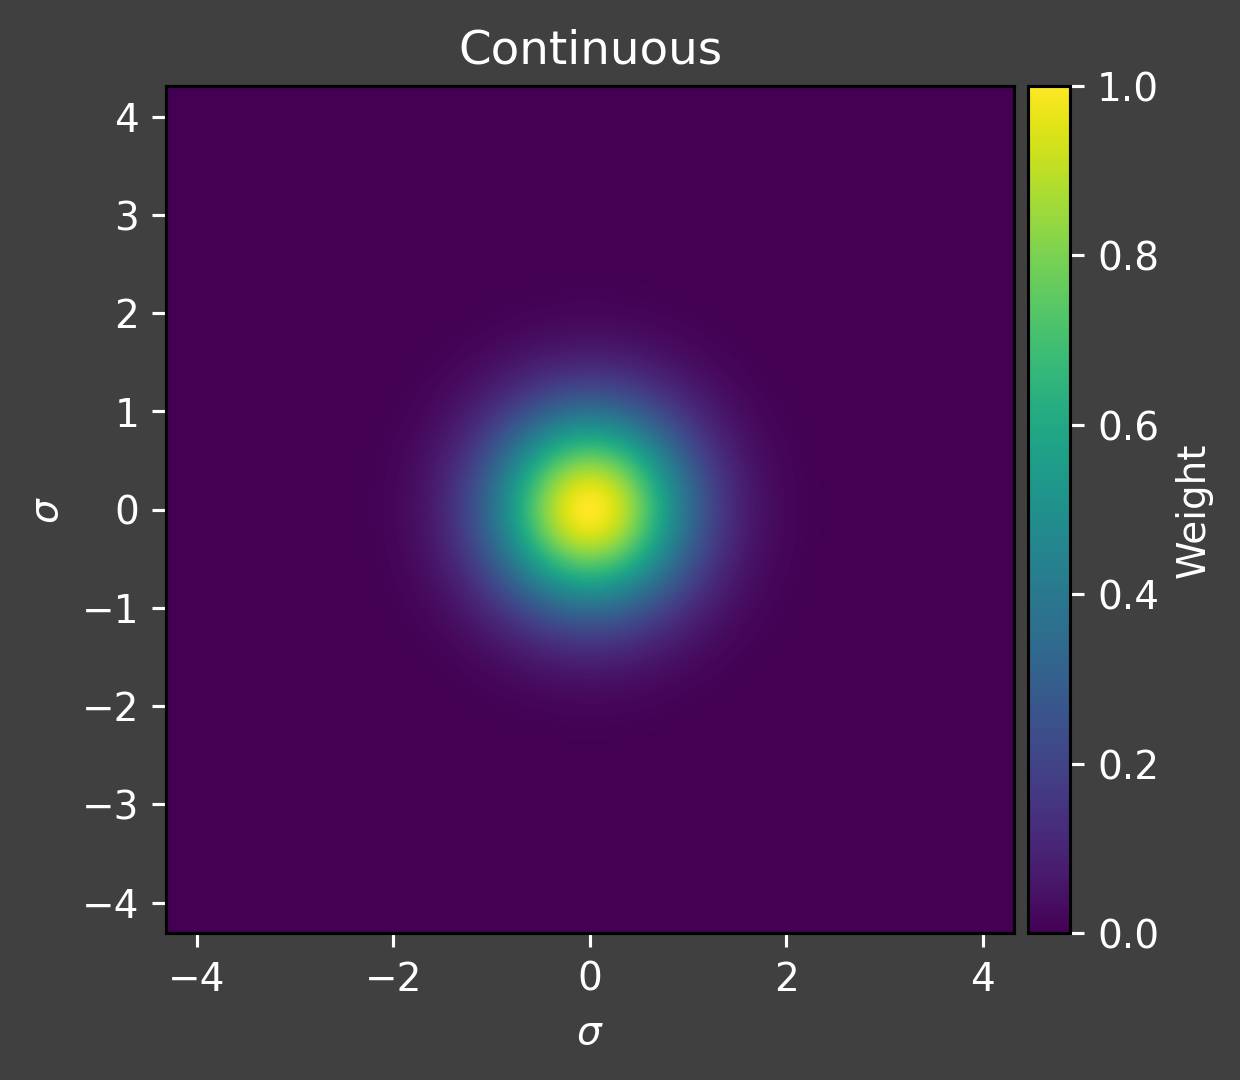

In [7]:
plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    z, 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title('Continuous', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

<ipython-input-4-045031887ffe>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "distance_from_coordinate" failed type inference due to: Use of unsupported NumPy function 'numpy.meshgrid' or unsupported use of the function.

File "<ipython-input-4-045031887ffe>", line 24:
def distance_from_coordinate(box_length):
    <source elided>
    # 2D mesh
    x_mesh, y_mesh = np.meshgrid(index, index, indexing='ij')
    ^

During: typing of get attribute at <ipython-input-4-045031887ffe> (24)

File "<ipython-input-4-045031887ffe>", line 24:
def distance_from_coordinate(box_length):
    <source elided>
    # 2D mesh
    x_mesh, y_mesh = np.meshgrid(index, index, indexing='ij')
    ^

  @jit
/lustre/aoc/projects/hera/wchin/anaconda3/envs/21cmfast/lib/python3.8/site-packages/numba/core/object_mode_passes.py:177: NumbaWarning: Function "distance_from_coordinate" was compiled in object mode without forceobj=True.

File "<ipython-input-4-045031887

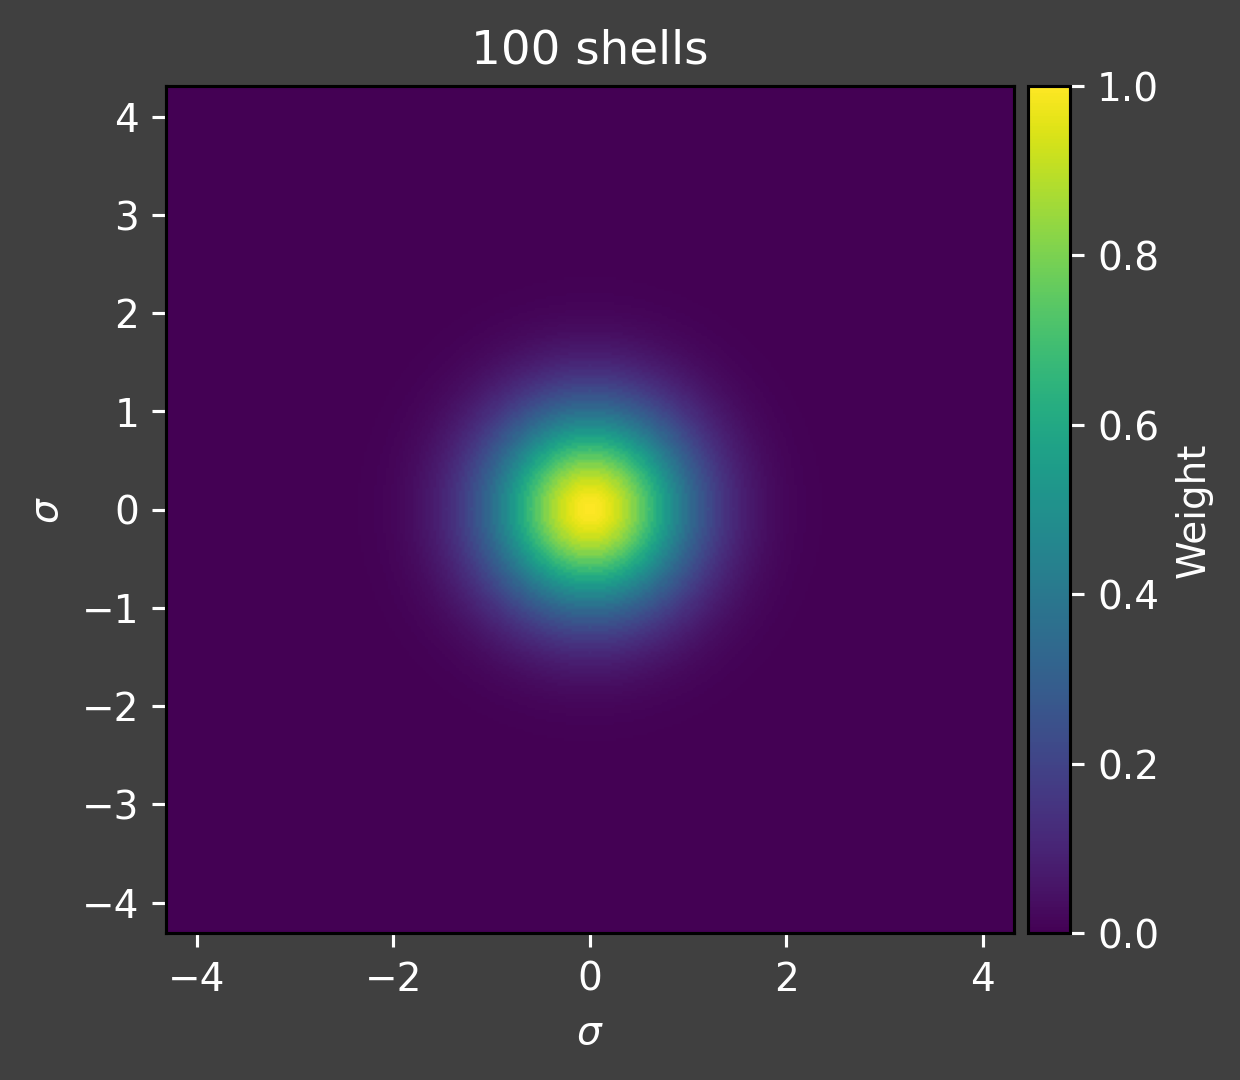

In [8]:
shell_num = 100

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

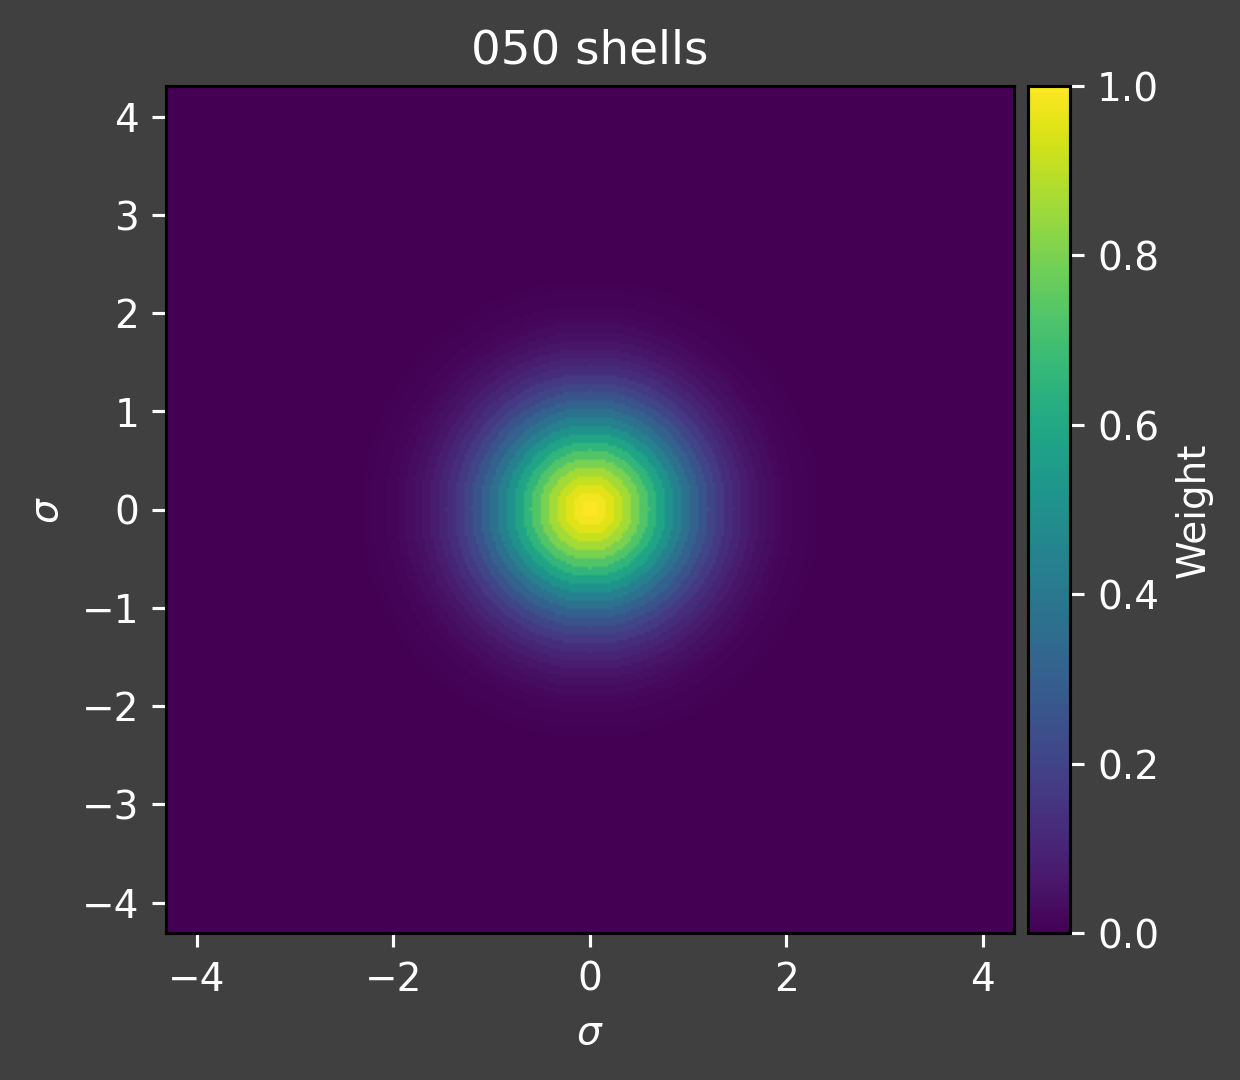

In [9]:
shell_num = 50

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'0{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

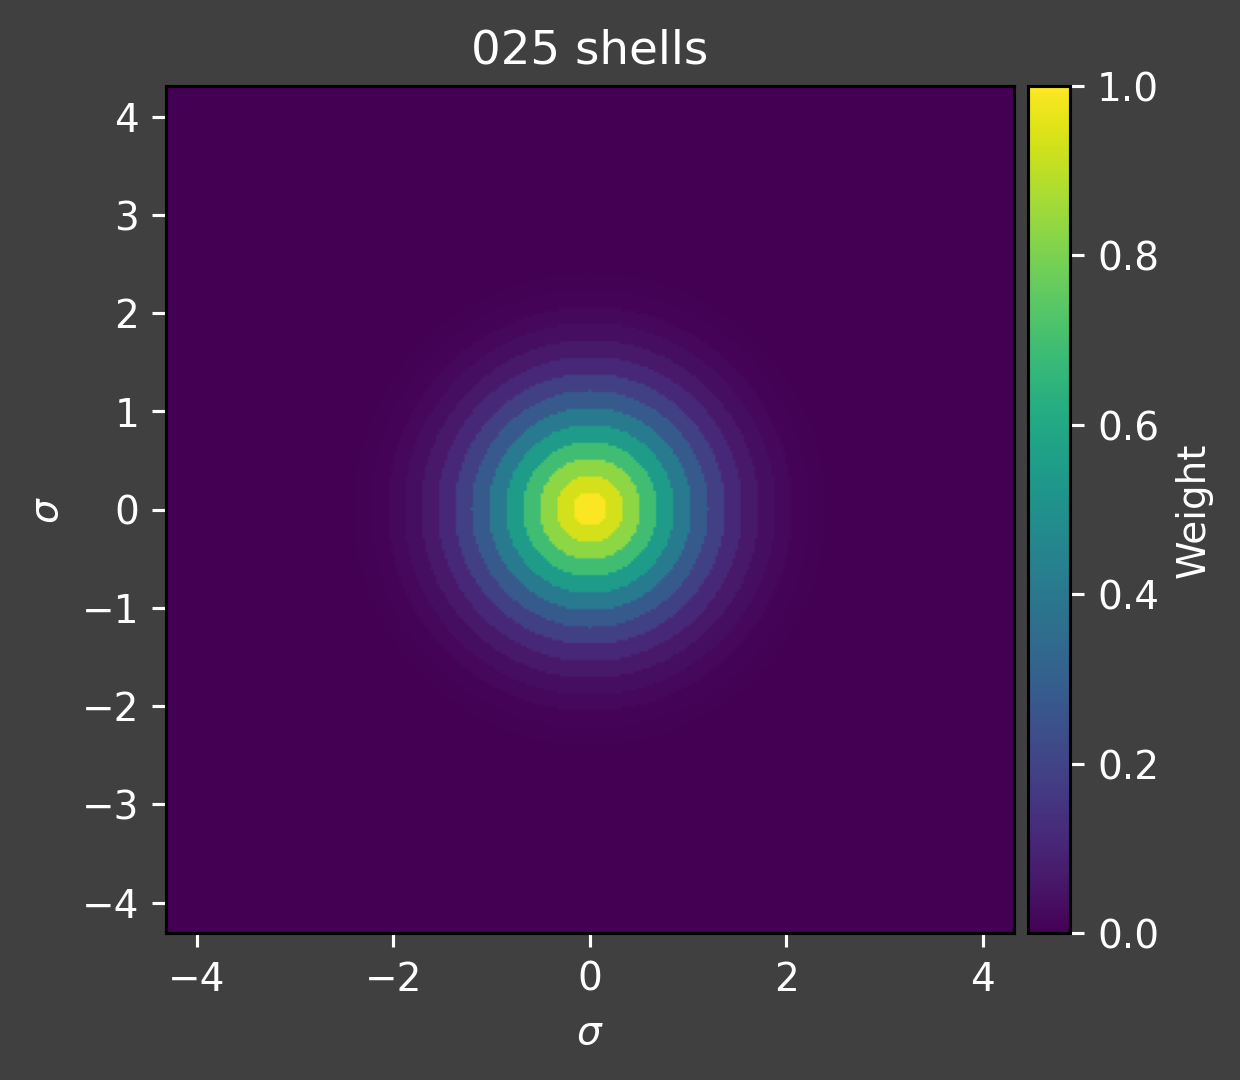

In [10]:
shell_num = 25

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'0{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

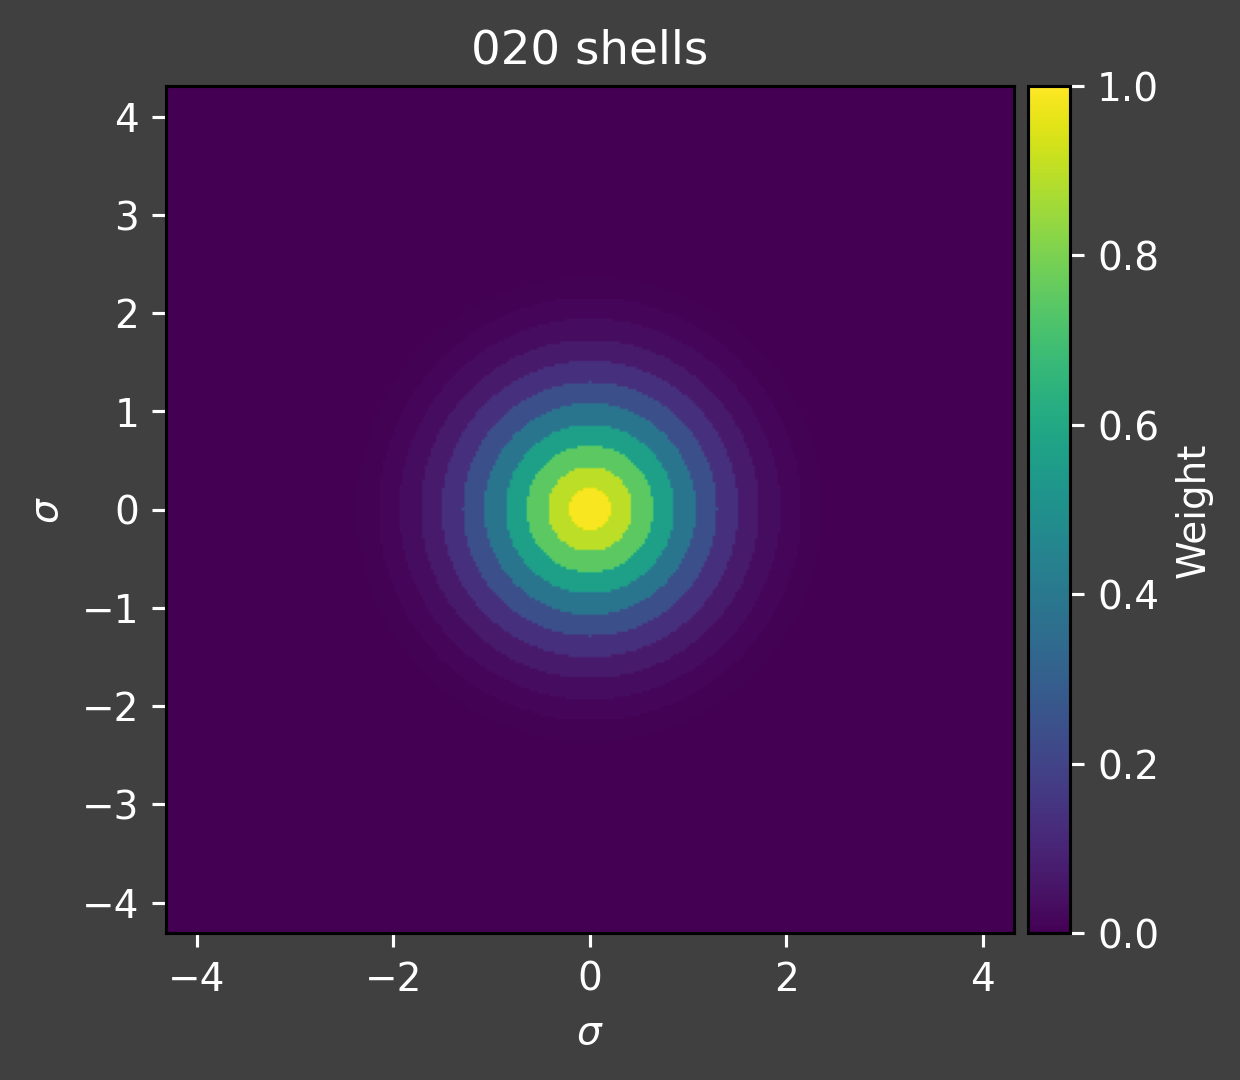

In [11]:
shell_num = 20

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'0{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

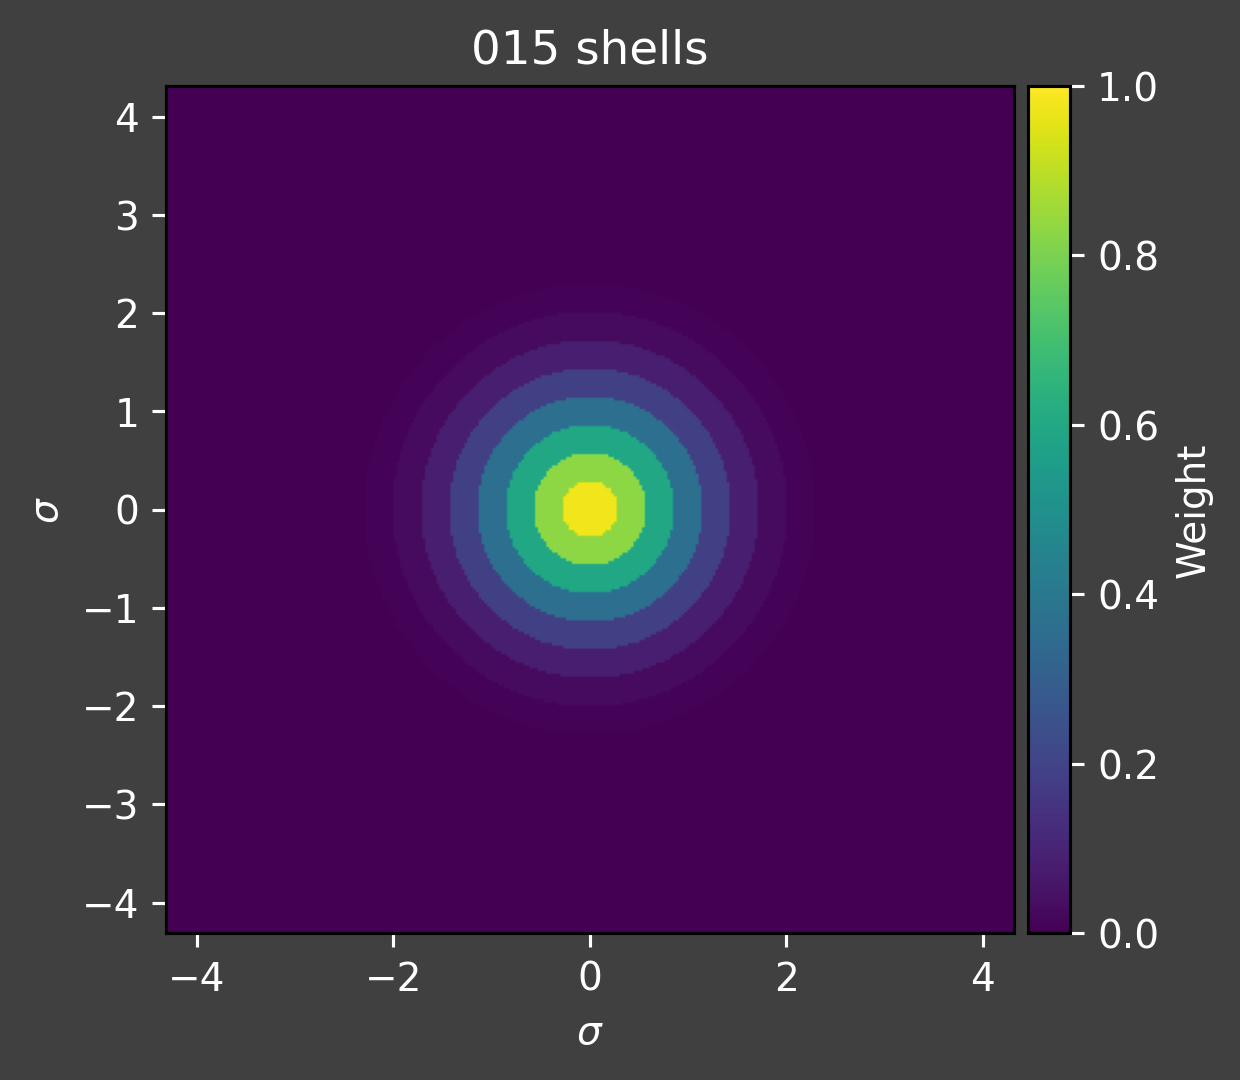

In [12]:
shell_num = 15

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'0{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

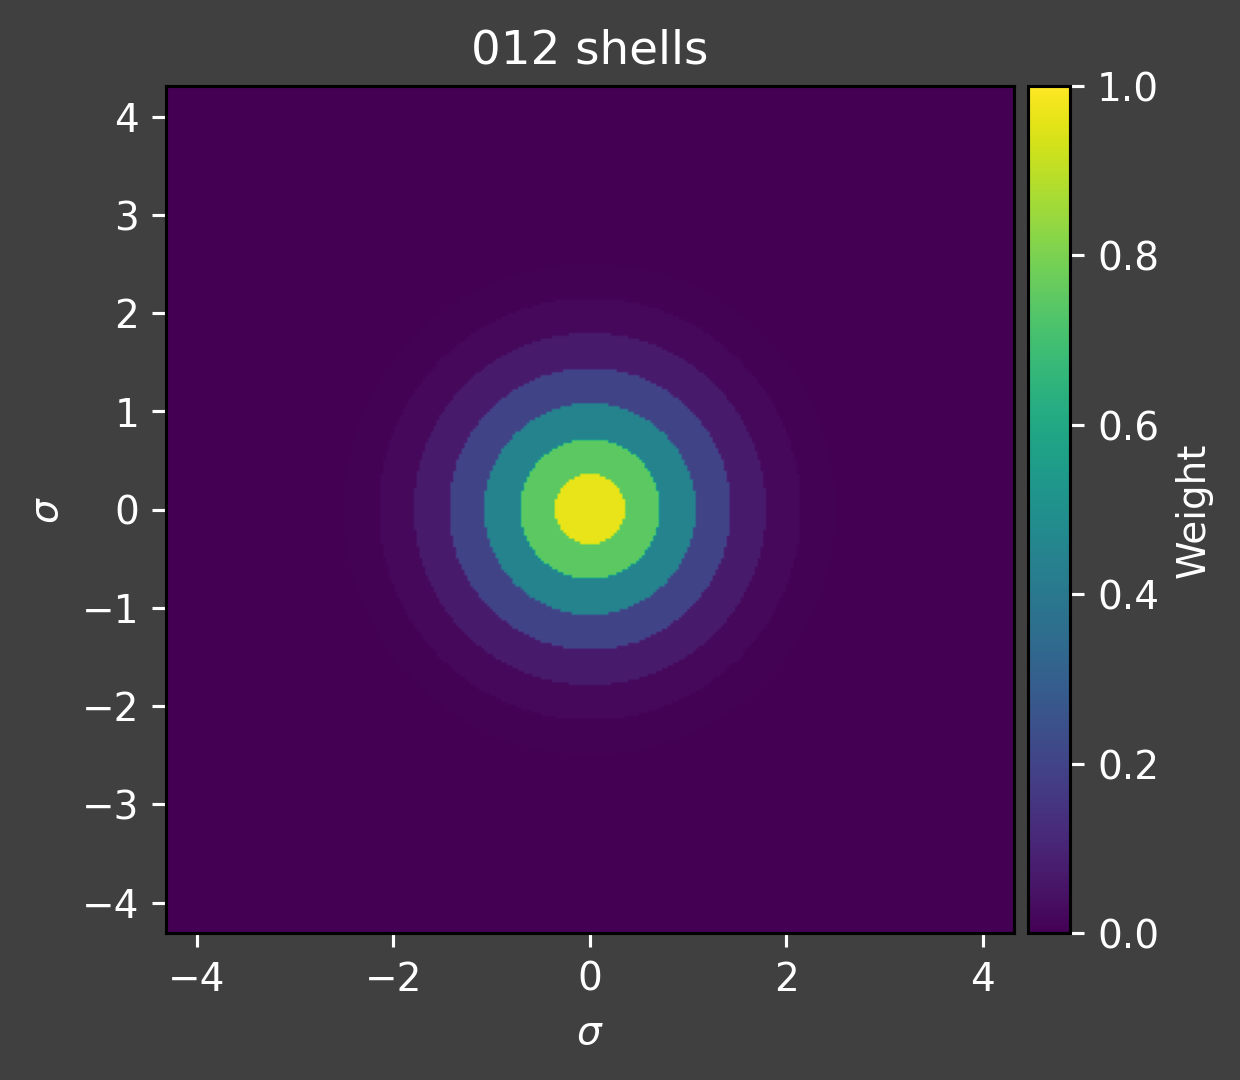

In [13]:
shell_num = 12

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'0{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

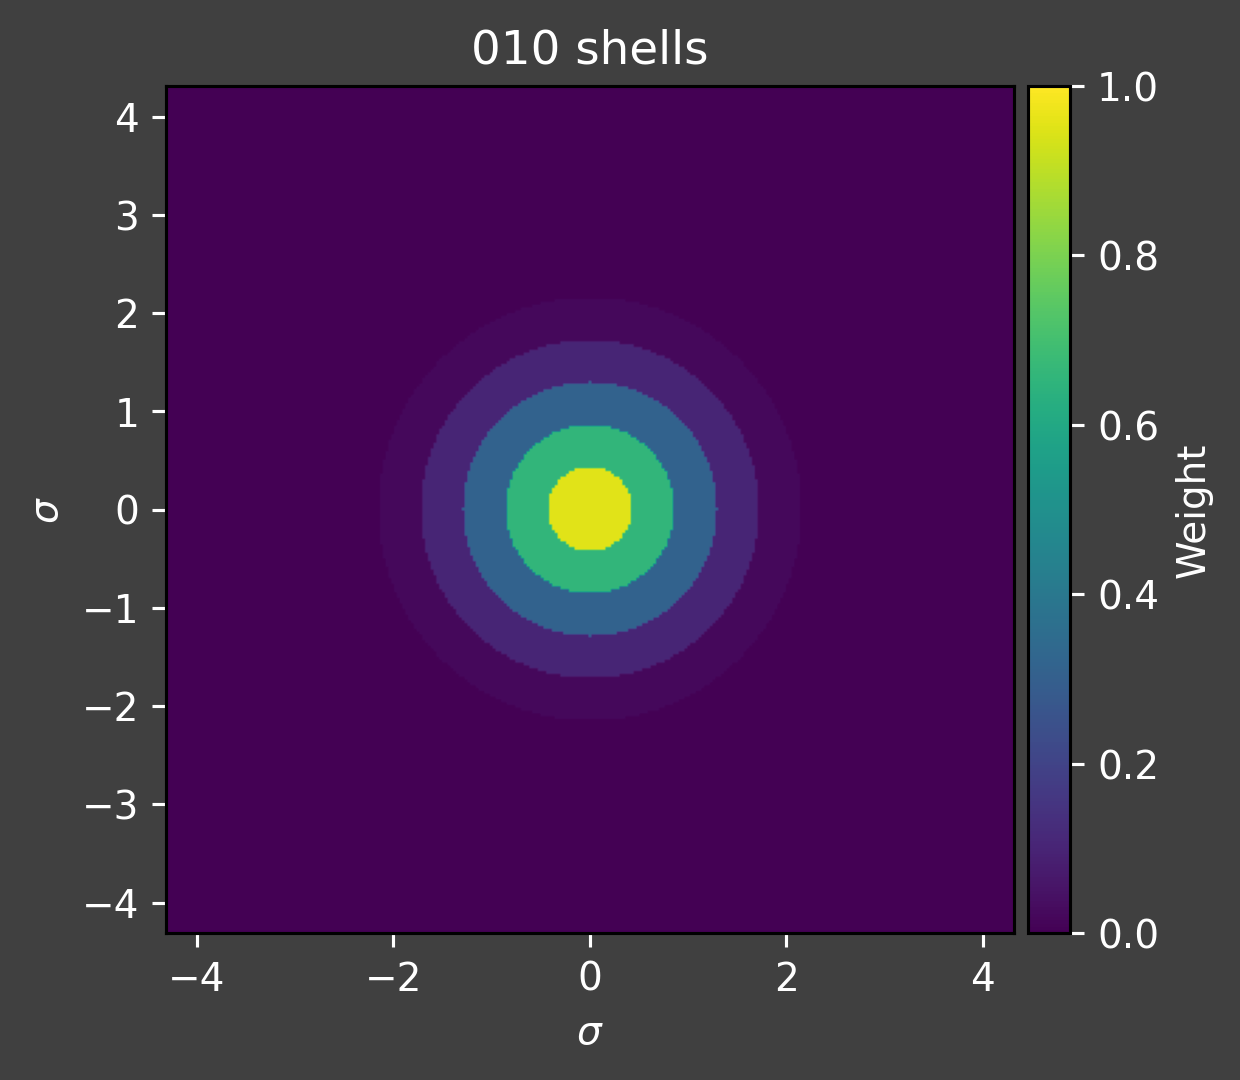

In [14]:
shell_num = 10

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'0{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

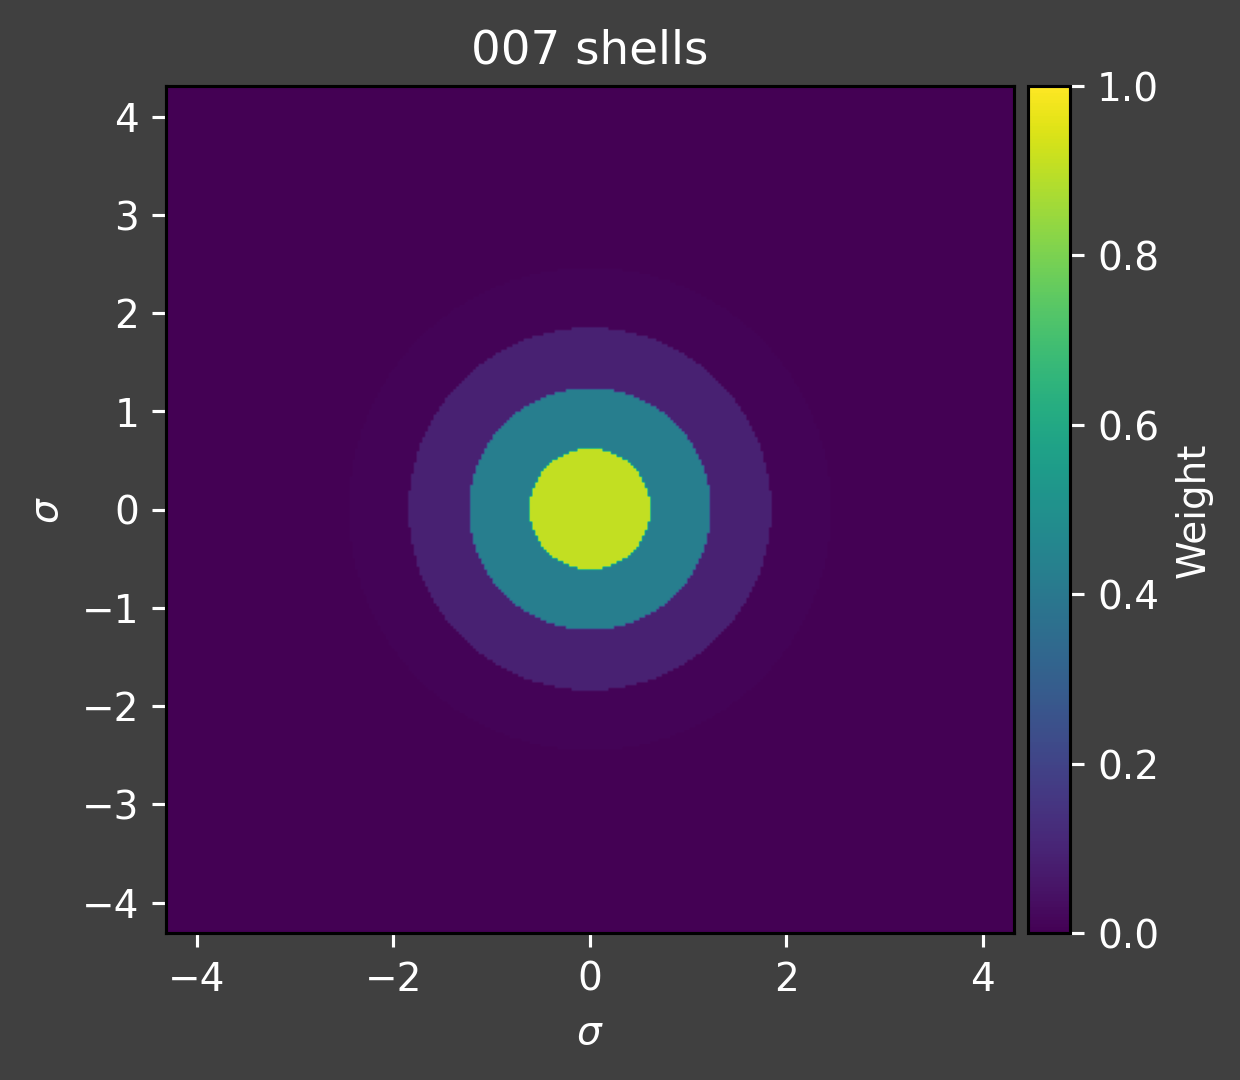

In [15]:
shell_num = 7

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'00{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

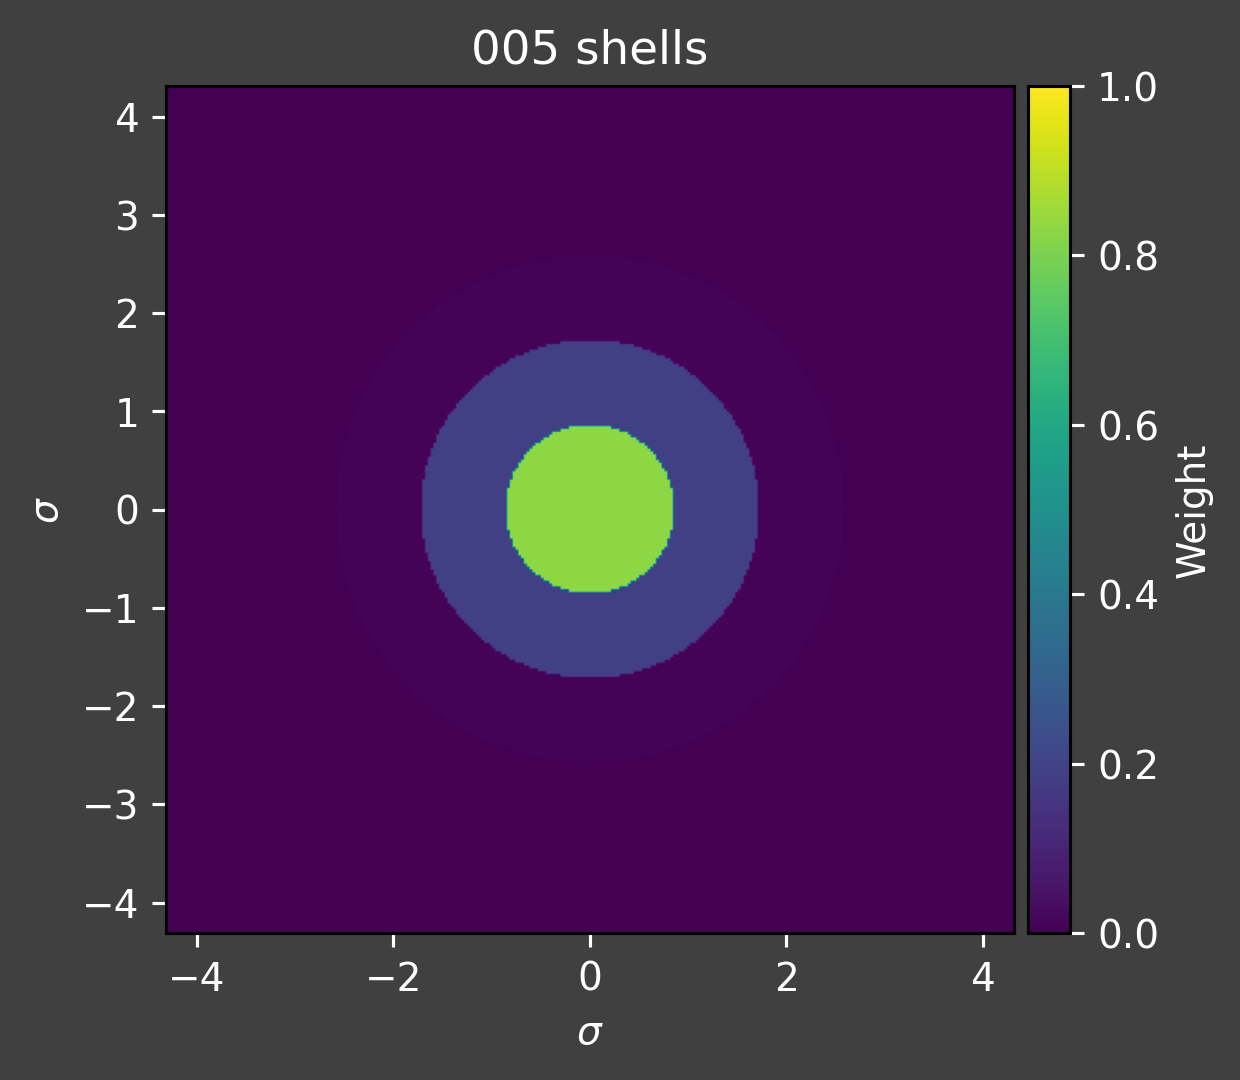

In [16]:
shell_num = 5

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'00{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()

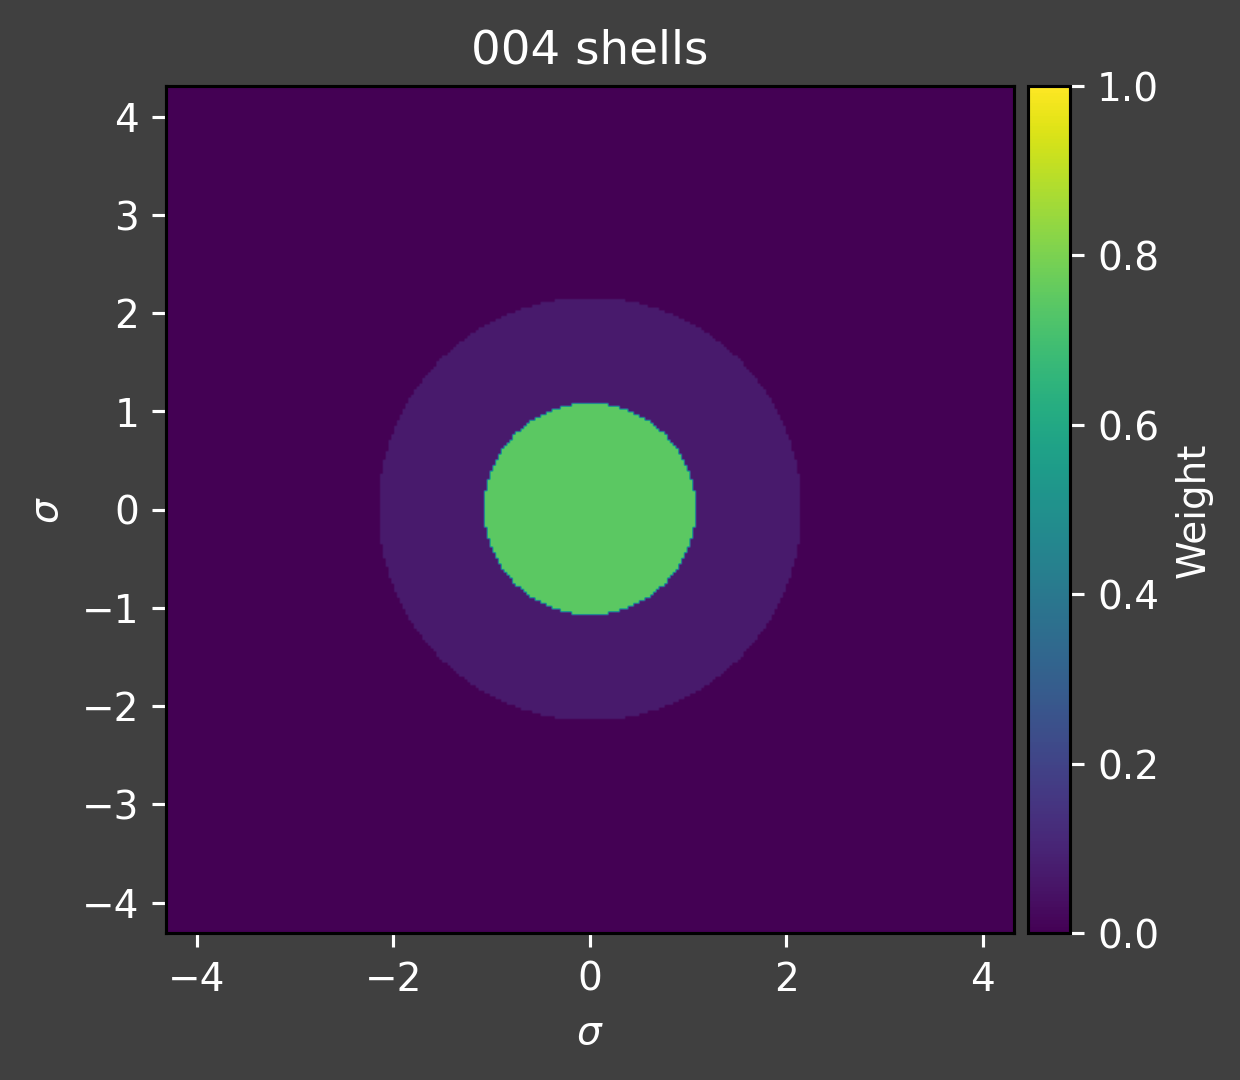

In [17]:
shell_num = 4

plt.figure(dpi=280.5, facecolor='#404040')
color='w'
im = plt.imshow(
    descretized_gaussian(shell_num), 
    extent=(-1.4370397097748921*3, 1.4370397097748921*3,-1.4370397097748921*3, 1.4370397097748921*3), 
    vmin=0, 
    vmax=1, 
    origin='lower'
)
plt.tick_params(color=color, labelcolor=color)
colorbar(im)
plt.title(f'00{shell_num} shells', color=color)
plt.xlabel(f'$\sigma$', color=color)
plt.ylabel(f'$\sigma$', color=color)
plt.show()